In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler , RobustScaler ,OneHotEncoder ,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, confusion_matrix, recall_score, roc_auc_score,classification_report ,plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from math import ceil
from xgboost import plot_tree , plot_importance
from sklearn import tree
from matplotlib import pyplot

In [2]:

pd.options.display.float_format = "{:,.2f}".format

In [3]:
 #! pip install graphviz
 # ! pip install xgboost

In [4]:
raw = pd.read_csv('dataset_raw.csv')
data= raw.copy()

In [5]:
data

,Number,Ticker,sector,city,industry,profitMargins,priceToBook,bookValue,shortRatio,revenuePerShare,...,COVID DEPENDANCY,CLASS,15/3/2020 0:00,10/4/2020 0:00,10/5/2020 0:00,10/9/2020 0:00,1/1/2021 0:00,20/2/2021 0:00,15/5/2021 0:00,10/9/2021 0:00
0,1,AAPL,Technology,Cupertino,Consumer Electronics,0.25,36.81,3.88,1.28,20.61,...,3,0,66.46,66.00,85.25,113.91,129.93,129.92,129.88,153.71
1,3,ADI,Technology,Wilmington,Semiconductors,0.26,5.11,32.99,2.22,17.63,...,6,1,93.97,98.06,120.81,114.11,147.92,160.27,167.18,166.42
2,4,ADM,Consumer Defensive,Chicago,Farm Products,0.03,1.70,37.28,1.94,133.43,...,3,0,34.21,36.45,40.93,46.05,51.01,56.15,64.36,59.69
3,5,ADP,Industrials,Roseland,Staffing & Employment Services,0.17,15.41,13.38,2.53,35.20,...,4,0,139.93,139.42,152.98,134.62,170.39,169.20,198.52,202.84
4,6,ADSK,Technology,San Rafael,Software—Application,0.33,54.38,5.13,2.06,17.74,...,6,1,152.20,156.28,229.26,228.20,301.69,302.91,276.97,287.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,418,XRX,Technology,Norwalk,Information Technology Services,0.04,0.74,28.26,4.32,36.31,...,5,1,24.87,18.99,17.94,18.84,22.93,23.74,24.50,21.22
392,419,XYL,Industrials,Rye Brook,Specialty Industrial Machinery,0.07,7.44,16.32,4.88,28.86,...,3,0,70.40,67.45,67.81,82.83,101.20,98.64,116.59,134.76
393,421,ZBH,Healthcare,Warsaw,Medical Devices,0.12,2.46,59.72,2.10,37.95,...,3,0,104.27,105.37,130.25,139.09,155.83,158.55,158.52,144.72
394,422,ZION,Financial Services,Salt Lake City,Banks—Regional,0.35,1.41,44.98,3.92,19.58,...,7,1,29.15,28.85,37.04,31.74,44.62,51.41,54.11,57.24


# Data Cleaning


In [6]:

data.drop('Number',axis=1,inplace=True)

In [7]:
data.set_index('Ticker',inplace=True)

In [8]:
data

,sector,city,industry,profitMargins,priceToBook,bookValue,shortRatio,revenuePerShare,operatingMargins,forwardEps,...,COVID DEPENDANCY,CLASS,15/3/2020 0:00,10/4/2020 0:00,10/5/2020 0:00,10/9/2020 0:00,1/1/2021 0:00,20/2/2021 0:00,15/5/2021 0:00,10/9/2021 0:00
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,Technology,Cupertino,Consumer Electronics,0.25,36.81,3.88,1.28,20.61,0.29,5.68,...,3,0,66.46,66.00,85.25,113.91,129.93,129.92,129.88,153.71
ADI,Technology,Wilmington,Semiconductors,0.26,5.11,32.99,2.22,17.63,0.33,6.96,...,6,1,93.97,98.06,120.81,114.11,147.92,160.27,167.18,166.42
ADM,Consumer Defensive,Chicago,Farm Products,0.03,1.70,37.28,1.94,133.43,0.04,4.45,...,3,0,34.21,36.45,40.93,46.05,51.01,56.15,64.36,59.69
ADP,Industrials,Roseland,Staffing & Employment Services,0.17,15.41,13.38,2.53,35.20,0.22,7.30,...,4,0,139.93,139.42,152.98,134.62,170.39,169.20,198.52,202.84
ADSK,Technology,San Rafael,Software—Application,0.33,54.38,5.13,2.06,17.74,0.17,6.87,...,6,1,152.20,156.28,229.26,228.20,301.69,302.91,276.97,287.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRX,Technology,Norwalk,Information Technology Services,0.04,0.74,28.26,4.32,36.31,0.07,2.22,...,5,1,24.87,18.99,17.94,18.84,22.93,23.74,24.50,21.22
XYL,Industrials,Rye Brook,Specialty Industrial Machinery,0.07,7.44,16.32,4.88,28.86,0.12,3.28,...,3,0,70.40,67.45,67.81,82.83,101.20,98.64,116.59,134.76
ZBH,Healthcare,Warsaw,Medical Devices,0.12,2.46,59.72,2.10,37.95,0.17,8.77,...,3,0,104.27,105.37,130.25,139.09,155.83,158.55,158.52,144.72


## droping duplicate columns

In [9]:
data.drop(['profitMargins.1','volume.1'],axis=1, inplace=True)

In [10]:
data.drop(['COVID DEPENDANCY'],axis=1,inplace=True)

# Data Preprocessing

In [11]:
OH_encoder =OneHotEncoder(handle_unknown='ignore', sparse=False)


In [12]:
OH_encoder.fit(data['sector'].values.reshape(-1,1))

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [13]:
names = OH_encoder.get_feature_names(['sector'])

In [14]:

data[names]=OH_encoder.transform(data['sector'].values.reshape(-1,1))

In [15]:
data.columns

Index(['sector', 'city', 'industry', 'profitMargins', 'priceToBook',
       'bookValue', 'shortRatio', 'revenuePerShare', 'operatingMargins',
       'forwardEps', 'heldPercentInstitutions', 'heldPercentInsiders',
       'marketCap', 'volume', 'totalDebt', 'totalCash', 'beta',
       'totalCashPerShare', 'enterpriseValue', 'floatShares',
       'numberOfAnalystOpinions', 'COVID BEHAVIOUR', 'CLASS', '15/3/2020 0:00',
       '10/4/2020 0:00', '10/5/2020 0:00', '10/9/2020 0:00', '1/1/2021 0:00',
       '20/2/2021 0:00', '15/5/2021 0:00', '10/9/2021 0:00',
       'sector_Basic Materials', 'sector_Communication Services',
       'sector_Consumer Cyclical', 'sector_Consumer Defensive',
       'sector_Energy', 'sector_Financial Services', 'sector_Healthcare',
       'sector_Industrials', 'sector_Real Estate', 'sector_Technology',
       'sector_Utilities'],
      dtype='object')

In [16]:
names

array(['sector_Basic Materials', 'sector_Communication Services',
       'sector_Consumer Cyclical', 'sector_Consumer Defensive',
       'sector_Energy', 'sector_Financial Services', 'sector_Healthcare',
       'sector_Industrials', 'sector_Real Estate', 'sector_Technology',
       'sector_Utilities'], dtype=object)

# Exploratory Data Analysis

In [17]:
data.describe()

,profitMargins,priceToBook,bookValue,shortRatio,revenuePerShare,operatingMargins,forwardEps,heldPercentInstitutions,heldPercentInsiders,marketCap,...,sector_Communication Services,sector_Consumer Cyclical,sector_Consumer Defensive,sector_Energy,sector_Financial Services,sector_Healthcare,sector_Industrials,sector_Real Estate,sector_Technology,sector_Utilities
count,396.00,396.00,396.00,396.00,396.00,396.00,396.00,396.00,396.00,396.00,...,396.00,396.00,396.00,396.00,396.00,396.00,396.00,396.00,396.00,396.00
mean,0.12,11.05,34.03,3.63,56.29,-0.13,7.15,0.84,0.03,"71,915,406,665.05",...,0.04,0.14,0.08,0.06,0.15,0.11,0.14,0.06,0.11,0.07
std,0.19,32.59,34.13,2.36,75.08,3.88,6.55,0.13,0.08,"182,935,717,149.42",...,0.20,0.34,0.27,0.24,0.36,0.32,0.34,0.24,0.31,0.25
min,-1.50,0.00,0.31,0.82,0.13,-61.77,-1.38,0.31,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.06,1.90,12.79,2.14,17.79,0.11,3.12,0.76,0.00,"15,736,608,768.00",...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.12,3.63,24.53,2.95,32.05,0.18,5.33,0.86,0.01,"29,998,278,656.00",...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.20,7.58,42.55,4.24,64.13,0.27,9.08,0.93,0.01,"61,668,108,288.00",...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.13,331.45,249.02,15.24,600.37,0.65,42.90,1.25,0.60,"2,384,660,000,000.00",...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


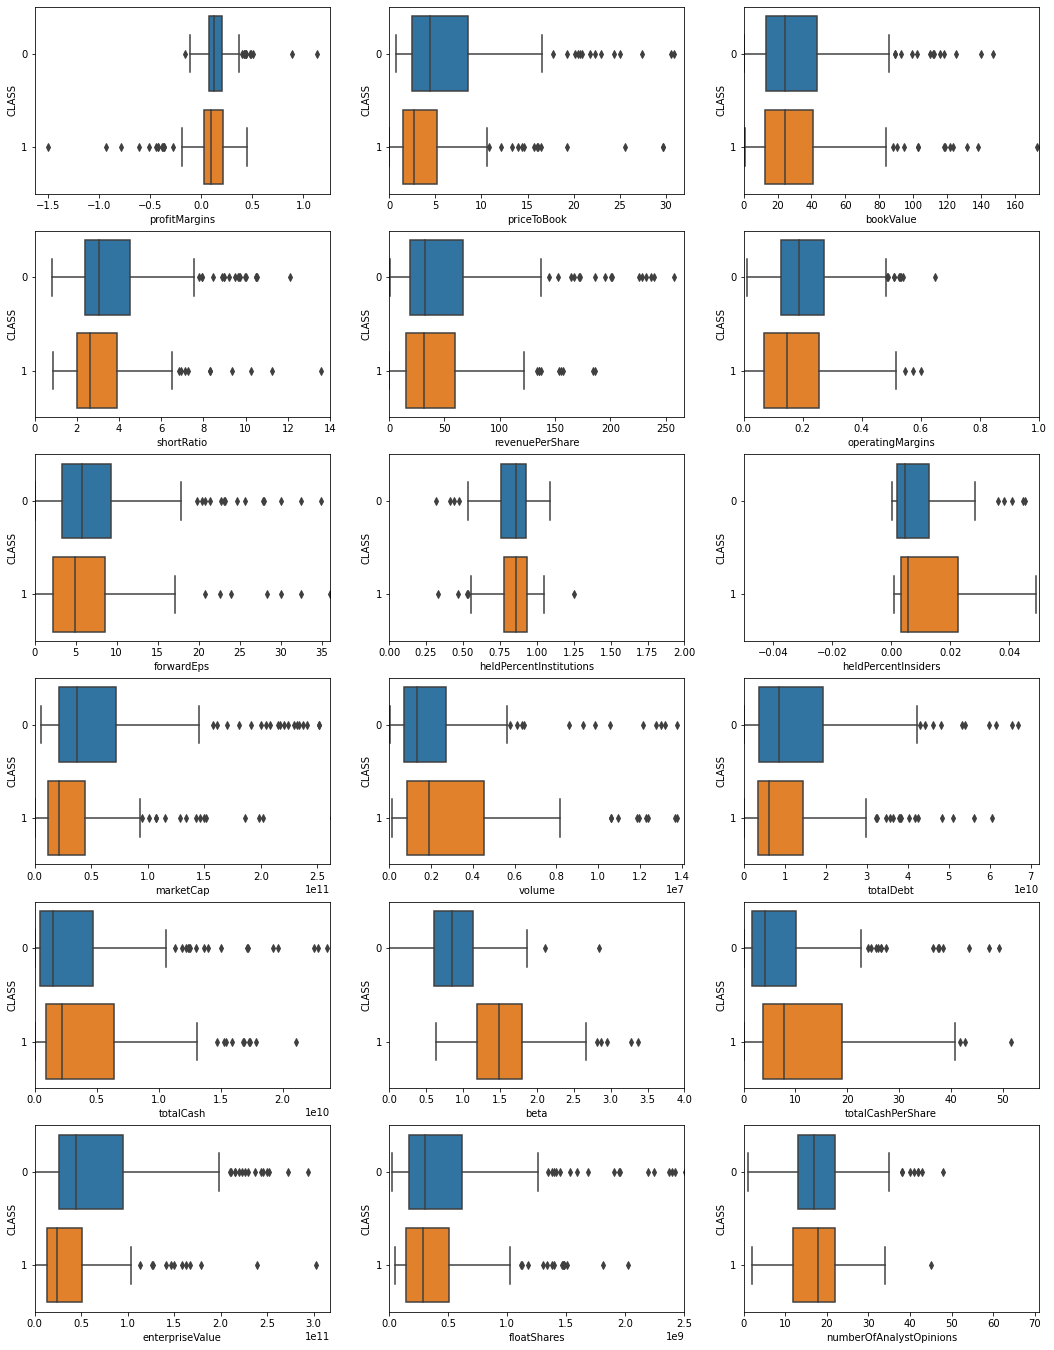

In [18]:
f, axes = plt.subplots(6, 3, figsize=(18, 24))

counter=1
hor=0
ver=0
for n in data:
    if(counter>=4 and counter<=21):
        bpDF = pd.concat([data[n], data['CLASS']], axis = 1).reindex(data[n].index)
        theplot=sb.boxplot(x = n, y = "CLASS", data = bpDF, orient = "h",ax = axes[ver,hor])
        stat=pd.DataFrame(data[n].describe())
        pmax=(stat.iloc[6]+1.5*(stat.iloc[6]-stat.iloc[4]))*2
        del stat
        if(counter!=4):
            theplot.set_xlim(0,int(pmax))
        del bpDF
        hor+=1
        if(hor==3):
            hor=0
            ver+=1
    counter+=1


# Univariate vs Multivariate 

In [19]:
X = pd.DataFrame(data['beta'])
y = pd.DataFrame(data['CLASS'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [20]:
RS = RobustScaler()
X_train = RS.fit_transform(X_train)
X_test = RS.transform(X_test)

In [21]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(X_train,y_train)

GaussianNB()

In [22]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=gb, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 76.25 %
std is 4.99 %


In [23]:
pre4=gb.predict(X_test)


In [24]:
Naive_bayes_Gaussian_nb=accuracy_score(pre4,y_test)
print(accuracy_score(pre4,y_test))
print(confusion_matrix(y_test,pre4))

0.7375
[[43  3]
 [18 16]]


In [25]:
X = pd.DataFrame(data[['beta','sector_Healthcare','marketCap','heldPercentInsiders']])
y = pd.DataFrame(data['CLASS'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [26]:
RS = RobustScaler()
X_train = RS.fit_transform(X_train)
X_test = RS.transform(X_test)

In [27]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(X_train,y_train)

GaussianNB()

In [28]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=gb, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 71.22 %
std is 6.44 %


In [29]:
pre4=gb.predict(X_test)


In [30]:
Naive_bayes_Gaussian_nb=accuracy_score(pre4,y_test)
print(accuracy_score(pre4,y_test))
print(confusion_matrix(y_test,pre4))

0.7375
[[28 18]
 [ 3 31]]


# Train Test Split

In [31]:
X= pd.DataFrame(data[['profitMargins',
 'priceToBook' ,'bookValue' ,'shortRatio' ,'revenuePerShare',
 'operatingMargins', 'forwardEps' ,'heldPercentInstitutions',
 'heldPercentInsiders', 'marketCap', 'volume', 'totalDebt',
 'totalCash', 'beta', 'totalCashPerShare' ,'enterpriseValue' ,'floatShares'
 , 'numberOfAnalystOpinions' ,'sector_Basic Materials', 'sector_Communication Services',
       'sector_Consumer Cyclical', 'sector_Consumer Defensive',
       'sector_Energy', 'sector_Financial Services', 'sector_Healthcare',
       'sector_Industrials', 'sector_Real Estate', 'sector_Technology',
       'sector_Utilities']])
y = pd.DataFrame(data['CLASS'])


In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

# Data preprocessing -*Scaling* the data

In [33]:
RS = RobustScaler()
X_train = RS.fit_transform(X_train)
X_test = RS.transform(X_test)

# LOGISTIC REGRESSION

In [34]:
lg=LogisticRegression()
lg.fit(X_train,y_train)


LogisticRegression()

In [35]:
pre=lg.predict(X_test)

In [36]:
lg_score=accuracy_score(y_test,pre)


In [37]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        46
           1       0.71      0.65      0.68        34

    accuracy                           0.74        80
   macro avg       0.73      0.73      0.73        80
weighted avg       0.74      0.74      0.74        80



In [38]:
print("f1score : " ,f1_score(y_test,pre))
lg_accuracies = cross_val_score(estimator=lg, X=X_train ,y=y_train,cv=10).mean()*100



f1score :  0.6769230769230768


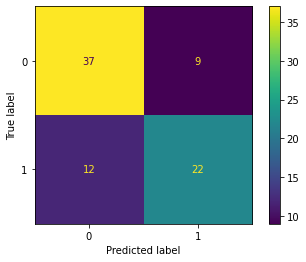

In [39]:
plot_confusion_matrix(lg,X_test,y_test)

0.7375


<AxesSubplot:>

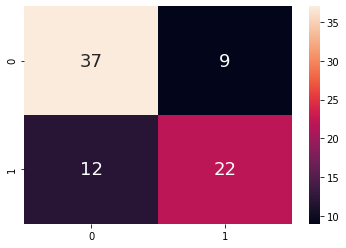

In [40]:
print(accuracy_score(y_test,pre))
sb.heatmap(confusion_matrix(y_test,pre), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# NAIVE BAYES

In [41]:

nb_accuracies = cross_val_score(estimator=gb, X=X_train ,y=y_train,cv=10).mean()*100



In [42]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(X_train,y_train)


GaussianNB()

In [43]:
pre4=gb.predict(X_test)

<AxesSubplot:>

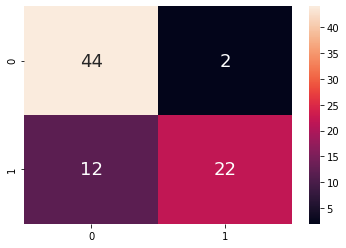

In [44]:
Naive_bayes_Gaussian_nb=accuracy_score(pre4,y_test)
nb_scores=accuracy_score(y_test,pre4)
sb.heatmap(confusion_matrix(y_test,pre4 ), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [45]:

print(classification_report(y_test,pre4))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86        46
           1       0.92      0.65      0.76        34

    accuracy                           0.82        80
   macro avg       0.85      0.80      0.81        80
weighted avg       0.84      0.82      0.82        80



# DECISION TREE CLASSIFIER


In [46]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion='gini',max_depth=5)
dc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [47]:

dtc_accuracies = cross_val_score(estimator=dc, X=X_train ,y=y_train,cv=10).mean()*100



In [48]:
pre5=dc.predict(X_test)


<AxesSubplot:>

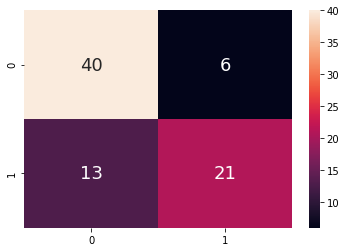

In [49]:
Decisiontress_classifier=accuracy_score(y_test,pre5)
dt_scores=accuracy_score(y_test,pre5)
sb.heatmap(confusion_matrix(y_test,pre5 ), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [50]:

print(classification_report(y_test,pre5))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81        46
           1       0.78      0.62      0.69        34

    accuracy                           0.76        80
   macro avg       0.77      0.74      0.75        80
weighted avg       0.76      0.76      0.76        80



# RANDOM FOREST CLASSIFIER

In [51]:
from sklearn.ensemble import RandomForestClassifier


rc=RandomForestClassifier(criterion='entropy',random_state=0)
rc.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', random_state=0)

In [52]:

pre6 = rc.predict(X_test)

In [53]:

#rfc_accuracies = cross_val_score(estimator=rc, X=X_train ,y=y_train,cv=10).mean()*100

rc_scores=accuracy_score(y_test,pre6)

<AxesSubplot:>

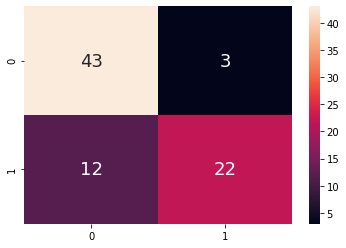

In [54]:
Random_forest=accuracy_score(pre6,y_test)
randomf=f1_score(y_test,pre6)
#print(accuracy_score(y_test,pre6))
sb.heatmap(confusion_matrix(y_test,pre6 ), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pre6))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        46
           1       0.88      0.65      0.75        34

    accuracy                           0.81        80
   macro avg       0.83      0.79      0.80        80
weighted avg       0.82      0.81      0.81        80



# XGBOOST 

In [56]:
xgb_model = xgb.XGBClassifier()

In [57]:

xgb_model.fit(X_train,y_train,early_stopping_rounds=15, 
             eval_set=[(X_test, y_test)],
             verbose=True,eval_metric='aucpr')


[0]	validation_0-aucpr:0.75112
[1]	validation_0-aucpr:0.80572
[2]	validation_0-aucpr:0.78966
[3]	validation_0-aucpr:0.78564
[4]	validation_0-aucpr:0.79727
[5]	validation_0-aucpr:0.78589
[6]	validation_0-aucpr:0.80745
[7]	validation_0-aucpr:0.79436
[8]	validation_0-aucpr:0.78995
[9]	validation_0-aucpr:0.79142
[10]	validation_0-aucpr:0.78415
[11]	validation_0-aucpr:0.77547
[12]	validation_0-aucpr:0.78309
[13]	validation_0-aucpr:0.77601
[14]	validation_0-aucpr:0.78884
[15]	validation_0-aucpr:0.79000
[16]	validation_0-aucpr:0.78877
[17]	validation_0-aucpr:0.79048
[18]	validation_0-aucpr:0.78770
[19]	validation_0-aucpr:0.78897
[20]	validation_0-aucpr:0.78716


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
pre7=xgb_model.predict(X_test)
xgb_score=accuracy_score(y_test,pre7)
print(accuracy_score(y_test,pre7))


0.8


In [59]:
xgb_model.fit(X_train,y_train,early_stopping_rounds=15, 
             eval_set=[(X_test, y_test)],
             verbose=False,eval_metric='aucpr')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
pre7=xgb_model.predict(X_test)
xgb_score=accuracy_score(y_test,pre7)




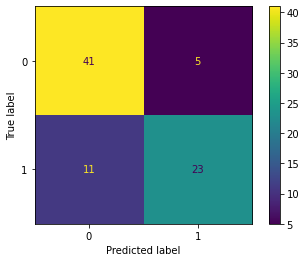

In [61]:
plot_confusion_matrix(xgb_model,X_test,y_test)

In [62]:
#xgboost_test_cv = cross_val_score(estimator=rc, X=X_test ,y=y_test,cv=10).mean()*100

In [63]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#  preliminary Accuracy summary of all models

In [64]:

print('Logistic regression: {:.2f} '.format(lg_score) ,'    f1 score: {:.2f} '.format(f1_score(y_test,pre)),'recall: {:.2f}'.format(recall_score(y_test,pre)))
#print('svmlinear:             ',svm_accuracies,'   f1 score:', f1_score(y_test,pre1),'precision:',recall_score(y_test,pre1))
print('naive bayes:       {:.2f}    '.format(nb_scores),'  f1 score: {:.2f}'.format(f1_score(y_test,pre4)),'recall: {:.2f}'.format(recall_score(y_test,pre4)))
#print('Decision tress:        ',dtc_accuracies,'  f1 score:',f1_score(y_test,pre5),'precision:',recall_score(y_test,pre5))
print('Random forest Acurracy: {:.2f}'.format(rc_scores), '  f1 score: {:.2f}'.format(f1_score(y_test,pre6)),'       recall: {:.2f}'.format(recall_score(y_test,pre6)))
print('XGBOOST:             {:.2f}  '.format(xgb_score),'              f1 score: {:.2f}'.format(f1_score(y_test,pre7)),'recall: {:.2f}'.format(recall_score(y_test,pre7)))
#print('Hyperparameter tuned XGBOOST:  {:.2f}'.format(improved_xgb_score) ,'f1 score: {:.2f}'.format(f1_score(y_test,improved_xgb_preds)),'precision: {:.2f}'.format(recall_score(y_test,improved_xgb_preds)))

Logistic regression: 0.74      f1 score: 0.68  recall: 0.65
naive bayes:       0.82       f1 score: 0.76 recall: 0.65
Random forest Acurracy: 0.81   f1 score: 0.75        recall: 0.65
XGBOOST:             0.80                 f1 score: 0.74 recall: 0.68


# Hyperparameter Tuning

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
xgb_tune= xgb.XGBClassifier()

In [67]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators':[100, 500, 1000],
         'gamma':np.arange(0,2.0,0.1),
    'reg_lambda' : np.arange(0,2.0,0.1),
    'scale_pos_weight':[0.3,0.5,0.6,1,2]}

In [68]:
clf = RandomizedSearchCV(estimator=xgb_tune,
                         param_distributions=params,
                      scoring='recall',
                         n_iter=50,  # WE USED 200 ITERATIONS setting 50 for smaller runtime

                         verbose=1,cv=7,n_jobs=-1
                        
                        )

In [69]:
clf.fit(X_train,y_train,early_stopping_rounds=10, 
             eval_set=[(X_test, y_test)],
             verbose=False)

Fitting 7 folds for each of 50 candidates, totalling 350 fits
[23:48:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=7,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                        'gamma': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                

In [70]:
print(clf.best_params_,'\n')
 

{'subsample': 0.8999999999999999, 'scale_pos_weight': 2, 'reg_lambda': 0.8, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.7999999999999999, 'colsample_bylevel': 0.4} 



In [71]:
clf.best_estimator_ # use to create a new XGBOOST model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.4,
              colsample_bynode=1, colsample_bytree=0.7999999999999999,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=0.8,
              scale_pos_weight=2, subsample=0.8999999999999999,
              tree_method='exact', validate_parameters=1, verbosity=None)

## improved xgboost

Create a new xgboost model using parameters resulted from hyperparamter tuning .
Change improved_xgb below accordingly


In [72]:
improved_xgb= xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.4,
              gamma=1.4000000000000001, learning_rate=0.01, max_delta_step=0,
              max_depth=3, min_child_weight=1,  n_estimators=1000,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=0.5, scale_pos_weight=2,
              seed=None, silent=None, subsample=0.6, verbosity=1)

In [73]:
improved_xgb.fit(X_train,y_train,early_stopping_rounds=15, 
             eval_set=[(X_test, y_test)],
             verbose=False,eval_metric='aucpr')


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=1.4000000000000001, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=1, nthread=1, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=0.5,
              scale_pos_weight=2, seed=0, silent=None, subsample=0.6,
              tree_method='exact', validate_parameters=1, ...)

In [74]:
improved_xgb_preds=improved_xgb.predict(X_test)
improved_xgb_score=accuracy_score(y_test,improved_xgb_preds)
print(improved_xgb_score)


0.775


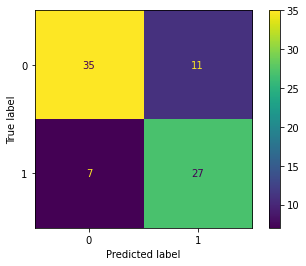

In [75]:
plot_confusion_matrix(improved_xgb,X_test,y_test)

In [76]:
print(' Hyperparameter tuned XGBOOST:  ', improved_xgb_score,'    f1 score:',f1_score(y_test,improved_xgb_preds),'recall:',recall_score(y_test,improved_xgb_preds))

 Hyperparameter tuned XGBOOST:   0.775     f1 score: 0.7499999999999999 recall: 0.7941176470588235


In [77]:
improved_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=1.4000000000000001, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=1, nthread=1, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=0.5,
              scale_pos_weight=2, seed=0, silent=None, subsample=0.6,
              tree_method='exact', validate_parameters=1, ...)

## feature importance

In [78]:
xgnames= X.columns

In [79]:
list(xgnames)

['profitMargins',
 'priceToBook',
 'bookValue',
 'shortRatio',
 'revenuePerShare',
 'operatingMargins',
 'forwardEps',
 'heldPercentInstitutions',
 'heldPercentInsiders',
 'marketCap',
 'volume',
 'totalDebt',
 'totalCash',
 'beta',
 'totalCashPerShare',
 'enterpriseValue',
 'floatShares',
 'numberOfAnalystOpinions',
 'sector_Basic Materials',
 'sector_Communication Services',
 'sector_Consumer Cyclical',
 'sector_Consumer Defensive',
 'sector_Energy',
 'sector_Financial Services',
 'sector_Healthcare',
 'sector_Industrials',
 'sector_Real Estate',
 'sector_Technology',
 'sector_Utilities']

Text(0.5, 1.0, 'Feature Importance : XGBOOST')

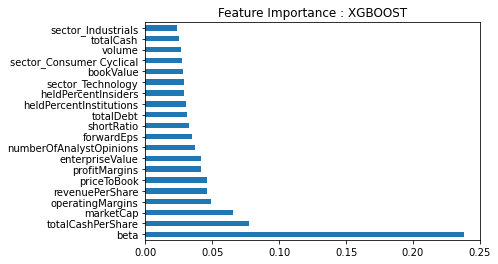

In [80]:

#plt.yticks(['beta','shortRatio','marketCap','bookValue','priceToBook','totalCashPerShare','operatingMargins','floatShares','revenueheldPercentInsiderser',,'totalDebt','heldPercentInstitutions','volume','profitMargins','heldPercentInstitutions','sector_Technology','sector_Industrials','volume','totalCash'])
feat_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Feature Importance : XGBOOST')

Text(0.5, 1.0, 'Feature Importance : Random Forest ')

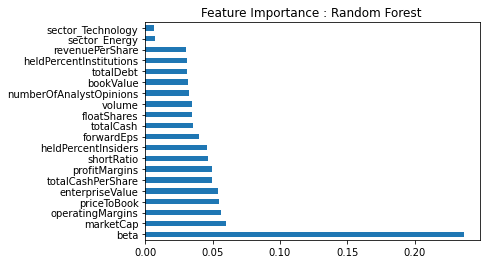

In [81]:
feat_importances = pd.Series(rc.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Feature Importance : Random Forest ')

Text(0.5, 1.0, 'Feature Importance : improved XGB ')

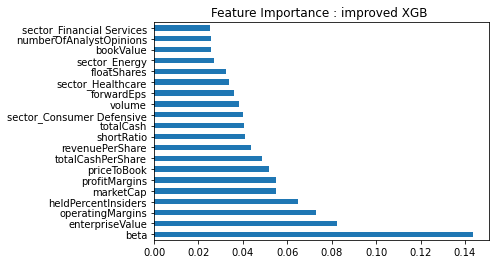

In [82]:
feat_importances = pd.Series(improved_xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Feature Importance : improved XGB ')

# FULL METRICS SUMMARY

In [83]:

print('Logistic regression: {:.4f} '.format(lg_score) ,'    f1 score: {:.2f} '.format(f1_score(y_test,pre)),'recall: {:.4f}'.format(recall_score(y_test,pre)))
#print('svmlinear:             ',svm_accuracies,'   f1 score:', f1_score(y_test,pre1),'precision:',recall_score(y_test,pre1))
print('naive bayes:       {:.4f}    '.format(nb_scores),'  f1 score: {:.2f}'.format(f1_score(y_test,pre4)),'reacall: {:.4f}'.format(recall_score(y_test,pre4)))
#print('Decision tress:        ',dtc_accuracies,'  f1 score:',f1_score(y_test,pre5),'precision:',recall_score(y_test,pre5))
print('Random forest Acurracy: {:.4f}'.format(rc_scores), '  f1 score: {:.2f}'.format(f1_score(y_test,pre6)),'       recall: {:.4f}'.format(recall_score(y_test,pre6)))
print('XGBOOST:             {:.4f}  '.format(xgb_score),'              f1 score: {:.2f}'.format(f1_score(y_test,pre7)),'  recall: {:.4f}'.format(recall_score(y_test,pre7)))
print('Hyperparameter tuned XGBOOST:  {:.4f}'.format(improved_xgb_score) ,'f1 score: {:.2f}'.format(f1_score(y_test,improved_xgb_preds)),'recall: {:.4f}'.format(recall_score(y_test,improved_xgb_preds)))

Logistic regression: 0.7375      f1 score: 0.68  recall: 0.6471
naive bayes:       0.8250       f1 score: 0.76 reacall: 0.6471
Random forest Acurracy: 0.8125   f1 score: 0.75        recall: 0.6471
XGBOOST:             0.8000                 f1 score: 0.74   recall: 0.6765
Hyperparameter tuned XGBOOST:  0.7750 f1 score: 0.75 recall: 0.7941


# CONFUSION MATRIX

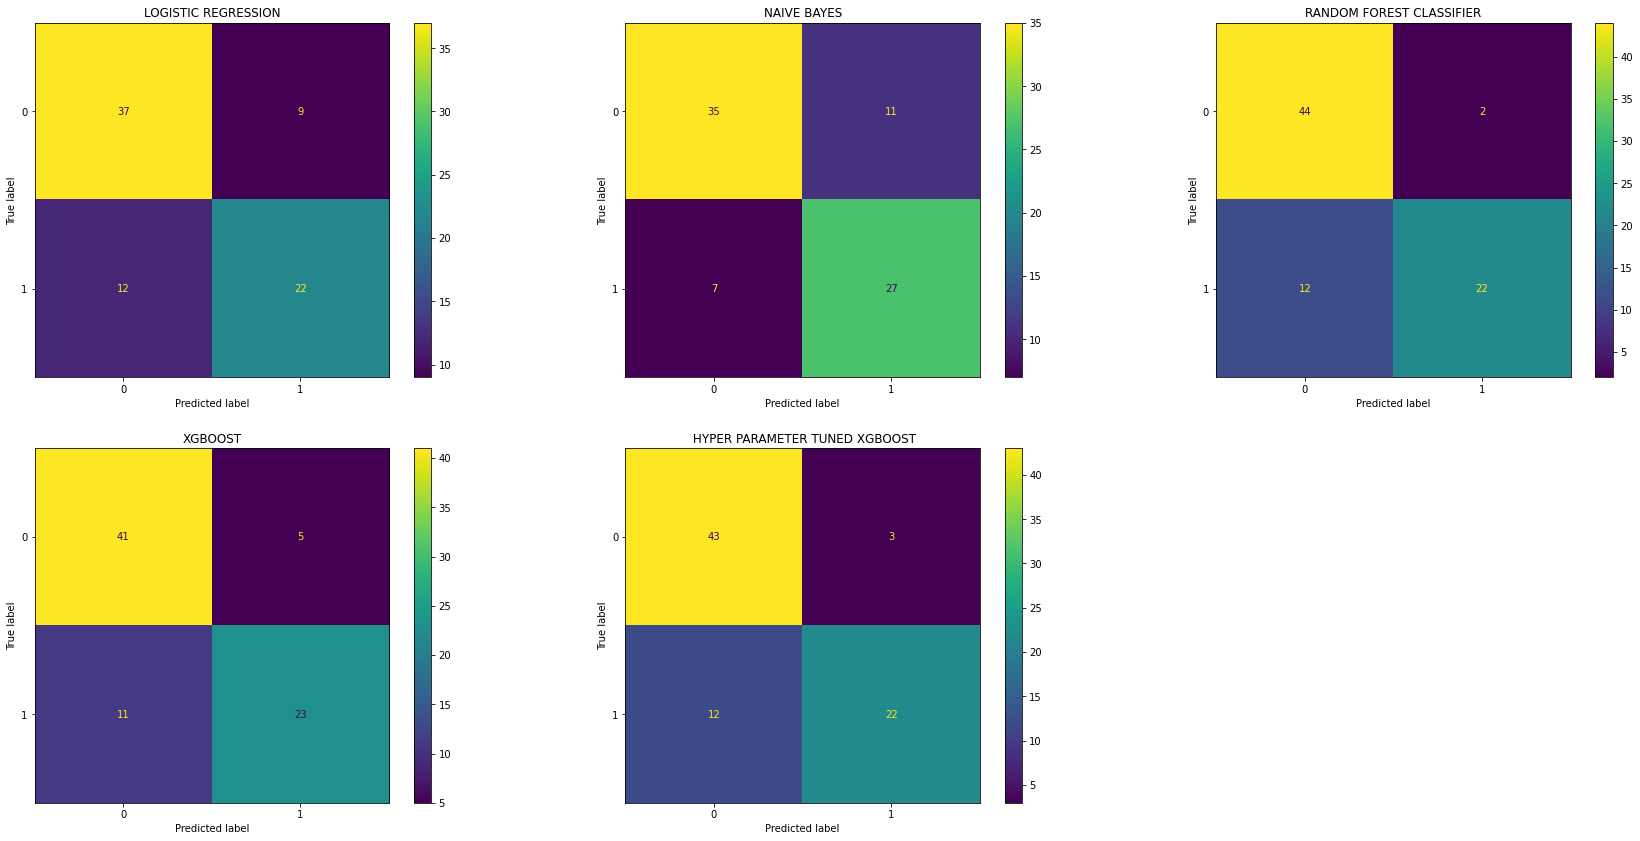

In [84]:
fig = plt.figure(figsize=(30
                          ,30))
ax1 = fig.add_subplot(431)
ax2 = fig.add_subplot(432)
ax3 = fig.add_subplot(433)
ax4 = fig.add_subplot(434)
ax5 = fig.add_subplot(435)

ax1.title.set_text('LOGISTIC REGRESSION')

ax2.title.set_text('NAIVE BAYES')

ax3.title.set_text('RANDOM FOREST CLASSIFIER')
ax4.title.set_text('XGBOOST')
ax5.title.set_text(' HYPER PARAMETER TUNED XGBOOST')
plot_confusion_matrix(improved_xgb,X_test,y_test,ax=ax2)

plot_confusion_matrix(xgb_model,X_test,y_test,ax=ax4)

plot_confusion_matrix(rc,X_test,y_test,ax=ax5)

plot_confusion_matrix(gb,X_test,y_test,ax=ax3)

plot_confusion_matrix(lg,X_test,y_test,ax=ax1)
plt.show()

# CODE AS A TOOL

In [85]:
#Sample company IDs to try: AEE,DFS

Enter company ID: 
AEE

Company Information: 
SECTOR  -  Utilities
CITY  -  Saint Louis
INDUSTRY  -  Utilities—Regulated Electric

Stock Behaviour: 


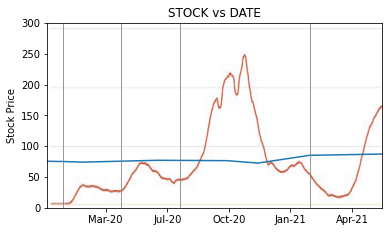

COVID Dependancy:  0


In [86]:
print("Enter company ID: ")
ID=input()

print("\nCompany Information: ")

i=0
for COL in data:
    if(i<3):
        print(COL.upper()," - ",data.loc[ID][COL])
    i+=1
    
print("\nStock Behaviour: ")
listvar=[data.loc[ID]['15/3/2020 0:00'],data.loc[ID]['10/4/2020 0:00'],data.loc[ID]['10/5/2020 0:00'],data.loc[ID]['10/9/2020 0:00'],data.loc[ID]['1/1/2021 0:00'],data.loc[ID]['20/2/2021 0:00'],data.loc[ID]['15/5/2021 0:00'],data.loc[ID]['10/9/2021 0:00']]
listvar

x=[43905,43931,43961,44084,44197,44247,44331,44449]

maxval=max(listvar)

img = plt.imread("COVIDUS.jpg")
fig, ax = plt.subplots()


ax.imshow(img, extent=[43905, 44449, 0,300])
p1 = ax.plot(x,listvar)

ax.axvline(x=44025,color='grey', linewidth=0.8)
ax.axvline(x=43930,color='grey', linewidth=0.8)
ax.axvline(x=44120,color='grey', linewidth=0.8)
ax.axvline(x=44331,color='grey', linewidth=0.8)
ax.set_ylabel('Stock Price')
ax.set_title('STOCK vs DATE')
ax.set_xticklabels(('Mar-20',
'Mar-20',
'Jul-20',
'Oct-20',
'Jan-21',
'Apr-21',
'Jul-21'))

plt.show()

print("COVID Dependancy: ",data.loc[ID]['CLASS'])

